In [ ]:
import os
import json
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

from utils import *

MHz = 1e6
GHz = 1e9
kHz = 1e3

T2_limit = 22.6 * kHz  # Hz

In [2]:

def extract_data_from_json(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data

levels = 'two_level'

data_folder_path = "data/data_sim/" + levels

files = [file for file in os.listdir(data_folder_path) if file.endswith(".json")]

# print the files with their index
[print(f"{i}: {file}") for i, file in enumerate(files)]


data_dict = {}

for file in files:
    length = int(file.split("-")[4])
    data_dict[str(length)] = extract_data_from_json(os.path.join(data_folder_path, file))
    
data_dict = dict(sorted(data_dict.items(), key=lambda item: int(item[0])))

print(data_dict.keys())

    

NameError: name 'os' is not defined

In [1]:
def extract_data(data_dict):
    sweep_params = data_dict["sweep_parms"]
    print(sweep_params.keys())
    measured_data = data_dict["measured_data"]
    analysis_params = data_dict["analysis"]

    x = sweep_params["detunings"]
    y = sweep_params["amplitudes"]
    z = measured_data["states"]

    x_min = analysis_params["x_min"]
    fwhms = analysis_params["fwhms"]
    snrs = analysis_params["snrs"]

    print(analysis_params.keys())

    x = np.array(x) / 2 / np.pi / MHz
    y = np.array(y) / 2 / np.pi / MHz
    z = np.array(z)
    
    x_min = np.array(x_min)
    fwhms = np.array(fwhms) / 2 / np.pi / MHz

    print(z)
    return x, y, z, x_min, fwhms, snrs


def plot_1d(ax: plt.Axes, data_dict):
    x, y, z, x_min, fwhms, snrs = data_dict
    for i in range(1, len(y), 25):
        ax.plot(x, z[i, :], label=f"Amp {y[i]:.2f} MHz")
        snr,fwhm,mu = FWHM(x, z[i, :],plot=True,rotate=True)
        # ax.axvline(mu, linestyle="--", color="r")
        # ax.axvline(mu - fwhm / 2, linestyle="--", color="g")
        # ax.axvline(mu + fwhm / 2, linestyle="--", color="g")
    ax.legend()
    ax.set_xlabel("Detuning (MHz)")
    ax.set_ylabel("Signal")
    ax.set_ylim([0, 1])
    
    
    
    
    # ax.axvline(x_min, linestyle="--", color="k", label="Min across amplitudes")
    # ax.legend()

def plot_2d(ax: plt.Axes, data_dict):
    x, y, z, x_min, fwhms, snrs = data_dict
    c = ax.pcolormesh(x, y, z,vmin = 0, vmax = 0.5, shading="auto")
    plt.colorbar(c, ax=ax, label="Value")
    
    snrs,fwhms,mus = FWHM_2D(x, y, z, rotate=True)
    
    
    ax.plot(fwhms / 2, y, "g--", label="FWHM")
    ax.plot(-fwhms / 2, y, "g--", label="FWHM")

    ax.legend()


# d = data_dict["10"]
# data = extract_data(d)

x = {}
fwhms = {}
snrs = {}

for l, d in data_dict.items():
    data = extract_data(d)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    plot_1d(axs[1], data)
    plot_2d(axs[0], data)

    mu,fwhm,snr = FWHM_2D(data[0], data[1], data[2], rotate=True)
    
    x[str(l)] = mu
    fwhms[str(l)] = fwhm
    snrs[str(l)] = snr
    
    # x[str(l)] = data[1]
    # fwhms[str(l)] = data[4]
    # snrs[str(l)] = data[5]

    
    



NameError: name 'plt' is not defined

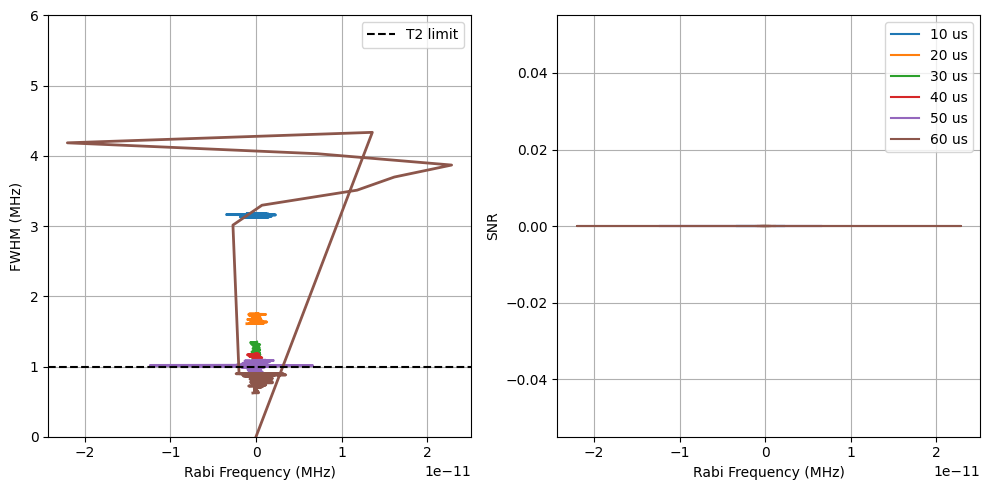

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# axs[0].axhline(T2_limit / 1e6, linestyle="-", color="k", label="T2 limit")

for l, fwhm in fwhms.items():
    axs[0].plot(x[l][1:], fwhm[1:]*1e6/T2_limit, "-",linewidth=2)
axs[0].axhline(1, linestyle="--", color="k", label="T2 limit")

axs[0].set_xlabel("Rabi Frequency (MHz)")
axs[0].set_ylabel("FWHM (MHz)")
axs[0].set_ylim(0, 6)
# axs[0].axhline(1, linestyle="-", color="k", label="T2 limit")

axs[0].legend()


for l, snr in snrs.items():

    axs[1].set_xlabel("Rabi Frequency (MHz)")
    axs[1].set_ylabel("SNR")
    # axs[1].set_ylim(0, 25)
    axs[1].plot(x[l][1:], snrs[l][1:]*0, "-", label=f"{l} us")
    axs[1].legend()
    
axs[0].grid()
axs[1].grid()


plt.tight_layout()
plt.savefig("fwhm.png", dpi=300)